### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 6
### Due: Saturday, Mar 14th at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

### Solution

In [90]:
#Imports

import numpy as np
import math as math
import scipy.stats as stats
from scipy import optimize
from matplotlib import pyplot as plt
import sklearn.model_selection as sklms
import sklearn.neighbors as skln
from astroML.density_estimation import KNeighborsDensity
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from sklearn import preprocessing

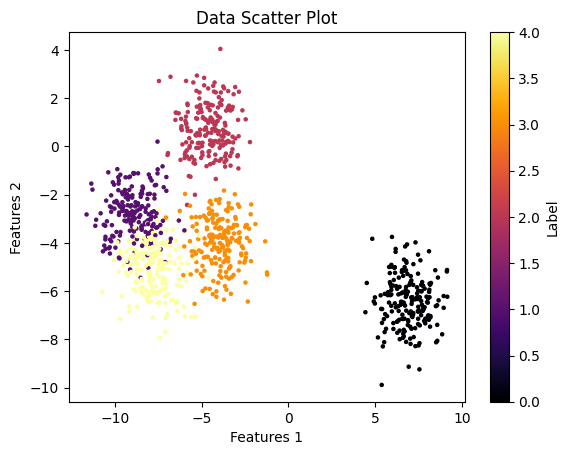

In [123]:
#1

data = np.load('hw6_data_1.npy')
feature_1 = data[:, 0]
feature_2 = data[:, 1]
features = data[:, : 2]
labels = data[:, 2]
#print(labels)
#print(features)

plt.scatter(feature_1, feature_2, c = labels, cmap = 'inferno', s = 5)
plt.xlabel("Features 1")
plt.ylabel("Features 2")
plt.title("Data Scatter Plot")
plt.colorbar(label = "Label")

Bandwidth: 0.4724137931034482


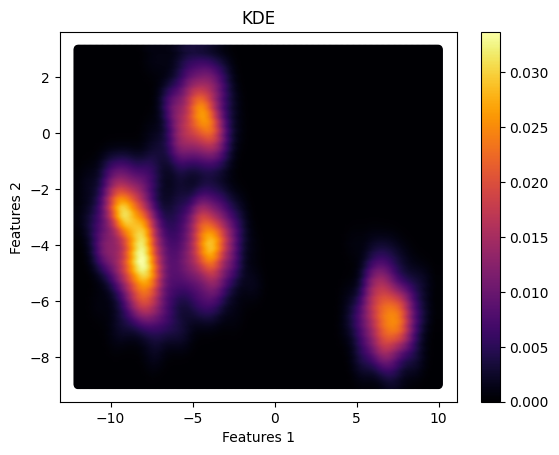

In [121]:
#2

bandwidth = np.linspace(0.1, 1.0, 30)

grid_1 = sklms.GridSearchCV(skln.KernelDensity(), {'bandwidth': bandwidth})
grid_1.fit(features)
Bob = grid_1.best_params_['bandwidth']
Jim = skln.KernelDensity(bandwidth = Bob, kernel = 'gaussian')
Jim.fit(features)

print("Bandwidth:", Bob)

kde = skln.KernelDensity(kernel='gaussian', bandwidth = Bob)
kde.fit(features)
#Define a new grid (grid_2)
x = np.linspace(-12,10,300)
y = np.linspace(-9,3,300)
grid_2 = np.vstack(list(map(np.ravel, np.meshgrid(x, y)))).T
dens = np.exp(kde.score_samples(grid_2))

plt.scatter(grid_2[:,0], grid_2[:,1], c = dens, cmap = 'inferno', edgecolor = "None")
plt.xlabel("Features 1")
plt.ylabel("Features 2")
plt.title("KDE")
plt.colorbar()


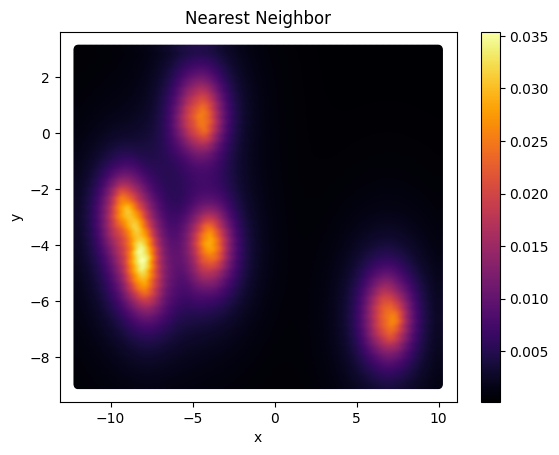

In [122]:
#3

N = 1000
n = 100 #Cycle through number of neighbors to find best. 100 Looks very close

neighbors = KNeighborsDensity('bayesian', n_neighbors = n)
neighbors.fit(features)
density = neighbors.eval(grid_2) / N

plt.scatter(grid_2[:,0], grid_2[:,1], c = density, cmap = 'inferno', edgecolor = "None")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Nearest Neighbor")
plt.colorbar()

The optimal is: 4


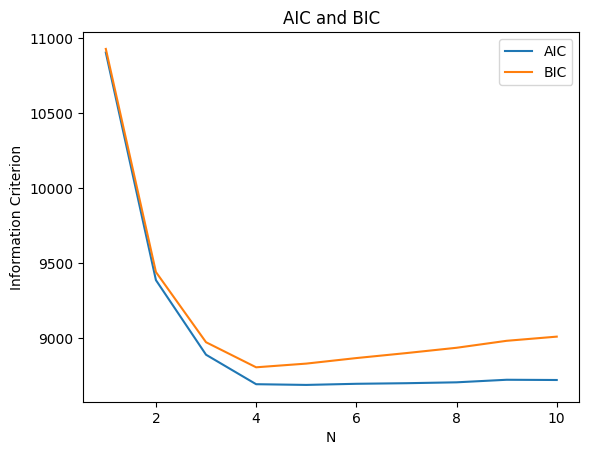

In [60]:
#4

N = np.arange(1, 11)
models = [None for i in range(len(N))]

for ii in range(len(N)):
    models[ii] = GaussianMixture(N[ii]).fit(features)

AIC = [m.aic(features) for m in models]
BIC = [m.bic(features) for m in models]

plt.plot(N, AIC, label = 'AIC')
plt.plot(N, BIC, label = 'BIC')
plt.xlabel('N')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC')
plt.legend()

print("The optimal is: 4")

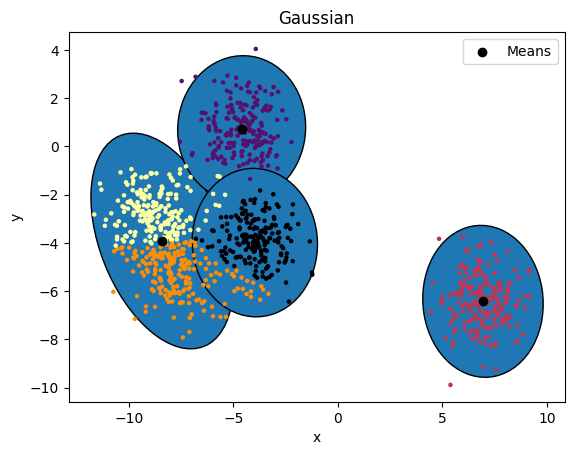

In [120]:
#4

#Ellipse bug fix
def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs))
        
Jane = GaussianMixture(4).fit(features)
mu = Jane.means_
cov  = Jane.covariances_

for ii in range(4):
    Mu = mu[ii]
    Cov  = cov[ii]
    draw_ellipse(Mu, Cov, scales = [3], ax = None, edgecolor = 'black')

plt.scatter(feature_1, feature_2, c = labels, cmap = 'inferno', s = 5)
plt.scatter(mu[:,0], mu[:,1], c = 'black', label='Means')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian")
plt.legend()

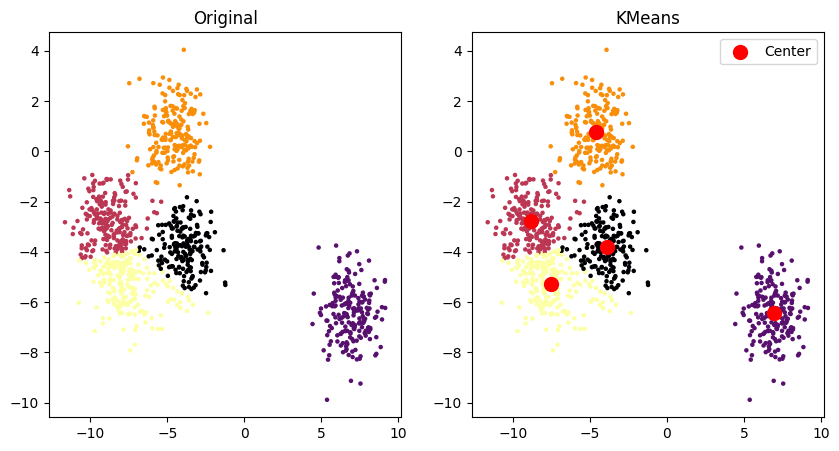

In [125]:
#5

scaler = preprocessing.StandardScaler()
Tom = scaler.fit_transform(features)
clf = KMeans(5)
clf.fit(Tom)
centers = scaler.inverse_transform(clf.cluster_centers_)
labels = clf.predict(Tom)

fig, (Sal, Sue) = plt.subplots(1, 2, figsize = (10, 5))
Sal.scatter(feature_1, feature_2, c = labels, cmap = 'inferno', s = 5)
Sal.set_title("Original")
Sue.scatter(feature_1, feature_2, c = labels, cmap = 'inferno', s = 5)
Sue.scatter(centers[:, 0], centers[:, 1], c = 'red', label = "Center", s = 100)
Sue.set_title("KMeans")
plt.legend()

<span style="color:green"> NP: Correct! Good job! </span>